In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

random.seed(777)  # for reproducibility
learning_rate = 0.001
batch_size = 10000
training_epochs = 200
nb_classes = 4
drop_rate = 0.3

In [2]:
xy = np.loadtxt('MIMO_2_0dB.csv', delimiter=',', dtype=np.float32)
x_data = xy[:, 1:13]
y_data = xy[:, -4:]

print(x_data.shape, y_data.shape)
print(x_data)

(400000, 12) (400000, 4)
[[ 3.985979    2.9266756  -1.4389254  ... -0.9246753  -0.30659586
   0.24227208]
 [-0.16229424 -2.2363117   0.46064845 ...  1.0533752   0.99633783
   1.0021063 ]
 [-1.4659348   1.0638415  -1.7712959  ... -0.556693    0.6281906
  -0.8111011 ]
 ...
 [-0.6823769   1.5280095  -0.04487954 ...  0.4623038  -0.16403863
   0.66769725]
 [ 0.9017219   0.17446594 -0.03713961 ... -0.63819283 -0.5459519
   0.48846105]
 [-0.7833187  -1.8923963   1.1181778  ... -0.30434546  0.33093032
  -1.3220665 ]]


In [3]:
# Convert y_data to y_bit
i=1
y_merge = []
while i <= y_data.shape[0]:
    temp = "".join(str(_) for _ in y_data[i-1,:])
    y_merge.append(temp)
    i = i + 1

encoder = LabelEncoder()
encoder.fit(y_merge)
y_bit = encoder.transform(y_merge)
y_bit = y_bit.reshape(-1, 1)
print(y_bit)

[[1]
 [1]
 [1]
 ...
 [2]
 [2]
 [2]]


In [4]:
# Convert y_data to one_hot
y_one_hot = tf.keras.utils.to_categorical(y_bit, nb_classes)
print("one_hot:", y_one_hot)

one_hot: [[0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 ...
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]]


In [5]:
tf.model = tf.keras.Sequential()
# Glorot normal initializer, also called Xavier normal initializer.
# see https://www.tensorflow.org/api_docs/python/tf/initializers

In [6]:
tf.model.add(tf.keras.layers.Dense(input_dim=x_data.shape[1], units=384, kernel_regularizer=tf.keras.regularizers.l2(0.001), activation='relu'))
tf.model.add(tf.keras.layers.Dropout(drop_rate))
tf.model.add(tf.keras.layers.Dense(units=192, kernel_regularizer=tf.keras.regularizers.l2(0.001), activation='relu'))
tf.model.add(tf.keras.layers.Dropout(drop_rate))
tf.model.add(tf.keras.layers.Dense(units=nb_classes, activation='softmax'))
tf.model.compile(loss='categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), metrics=['accuracy'])
tf.model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 384)               4992      
_________________________________________________________________
dropout (Dropout)            (None, 384)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 192)               73920     
_________________________________________________________________
dropout_1 (Dropout)          (None, 192)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 772       
Total params: 79,684
Trainable params: 79,684
Non-trainable params: 0
_________________________________________________________________


In [7]:
history = tf.model.fit(x_data, y_one_hot, batch_size=batch_size , validation_split=0.2, epochs=training_epochs)

Epoch 1/200
32/32 [==============================] - 1s 9ms/step - loss: 1.3445 - accuracy: 0.5522 - val_loss: 2.7566 - val_accuracy: 0.0000e+00
Epoch 2/200
32/32 [==============================] - 0s 5ms/step - loss: 0.9242 - accuracy: 0.7227 - val_loss: 1.7257 - val_accuracy: 0.1642
Epoch 3/200
32/32 [==============================] - 0s 5ms/step - loss: 0.7316 - accuracy: 0.7762 - val_loss: 1.4071 - val_accuracy: 0.4097
Epoch 4/200
32/32 [==============================] - 0s 5ms/step - loss: 0.6534 - accuracy: 0.7900 - val_loss: 1.3187 - val_accuracy: 0.4593
Epoch 5/200
32/32 [==============================] - 0s 5ms/step - loss: 0.6119 - accuracy: 0.7947 - val_loss: 1.2913 - val_accuracy: 0.4676
Epoch 6/200
32/32 [==============================] - 0s 5ms/step - loss: 0.5871 - accuracy: 0.7973 - val_loss: 1.2834 - val_accuracy: 0.4704
Epoch 7/200
32/32 [==============================] - 0s 5ms/step - loss: 0.5722 - accuracy: 0.7995 - val_loss: 1.2579 - val_accuracy: 0.4794
Epoch 8/2

Epoch 59/200
32/32 [==============================] - 0s 5ms/step - loss: 0.5130 - accuracy: 0.8056 - val_loss: 1.2188 - val_accuracy: 0.5114
Epoch 60/200
32/32 [==============================] - 0s 6ms/step - loss: 0.5130 - accuracy: 0.8053 - val_loss: 1.1739 - val_accuracy: 0.5230
Epoch 61/200
32/32 [==============================] - 0s 5ms/step - loss: 0.5130 - accuracy: 0.8049 - val_loss: 1.2155 - val_accuracy: 0.5067
Epoch 62/200
32/32 [==============================] - 0s 5ms/step - loss: 0.5117 - accuracy: 0.8065 - val_loss: 1.2263 - val_accuracy: 0.5078
Epoch 63/200
32/32 [==============================] - 0s 5ms/step - loss: 0.5124 - accuracy: 0.8063 - val_loss: 1.1514 - val_accuracy: 0.5344
Epoch 64/200
32/32 [==============================] - 0s 5ms/step - loss: 0.5116 - accuracy: 0.8057 - val_loss: 1.2094 - val_accuracy: 0.5120
Epoch 65/200
32/32 [==============================] - 0s 6ms/step - loss: 0.5116 - accuracy: 0.8056 - val_loss: 1.1769 - val_accuracy: 0.5230
Epoch 

32/32 [==============================] - 0s 5ms/step - loss: 0.5042 - accuracy: 0.8061 - val_loss: 1.1333 - val_accuracy: 0.5435
Epoch 117/200
32/32 [==============================] - 0s 6ms/step - loss: 0.5035 - accuracy: 0.8063 - val_loss: 1.1539 - val_accuracy: 0.5356
Epoch 118/200
32/32 [==============================] - 0s 5ms/step - loss: 0.5037 - accuracy: 0.8064 - val_loss: 1.1223 - val_accuracy: 0.5452
Epoch 119/200
32/32 [==============================] - 0s 5ms/step - loss: 0.5031 - accuracy: 0.8069 - val_loss: 1.2121 - val_accuracy: 0.5144
Epoch 120/200
32/32 [==============================] - 0s 5ms/step - loss: 0.5034 - accuracy: 0.8063 - val_loss: 1.1749 - val_accuracy: 0.5287
Epoch 121/200
32/32 [==============================] - 0s 5ms/step - loss: 0.5033 - accuracy: 0.8059 - val_loss: 1.2203 - val_accuracy: 0.5122
Epoch 122/200
32/32 [==============================] - 0s 5ms/step - loss: 0.5032 - accuracy: 0.8058 - val_loss: 1.1382 - val_accuracy: 0.5363
Epoch 123/200

32/32 [==============================] - 0s 5ms/step - loss: 0.4996 - accuracy: 0.8061 - val_loss: 1.1699 - val_accuracy: 0.5291
Epoch 174/200
32/32 [==============================] - 0s 5ms/step - loss: 0.5005 - accuracy: 0.8063 - val_loss: 1.1183 - val_accuracy: 0.5461
Epoch 175/200
32/32 [==============================] - 0s 5ms/step - loss: 0.4998 - accuracy: 0.8067 - val_loss: 1.1049 - val_accuracy: 0.5524
Epoch 176/200
32/32 [==============================] - 0s 5ms/step - loss: 0.4995 - accuracy: 0.8065 - val_loss: 1.2104 - val_accuracy: 0.5146
Epoch 177/200
32/32 [==============================] - 0s 5ms/step - loss: 0.4991 - accuracy: 0.8062 - val_loss: 1.1412 - val_accuracy: 0.5365
Epoch 178/200
32/32 [==============================] - 0s 5ms/step - loss: 0.4997 - accuracy: 0.8064 - val_loss: 1.1900 - val_accuracy: 0.5219
Epoch 179/200
32/32 [==============================] - 0s 5ms/step - loss: 0.4997 - accuracy: 0.8068 - val_loss: 1.1584 - val_accuracy: 0.5356
Epoch 180/200

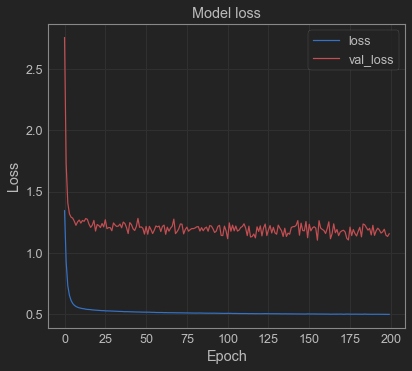

In [8]:
# 모델 손실 함수 시각화
from jupyterthemes import jtplot
jtplot.style(theme='monokai')

plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r-', label='val_loss')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

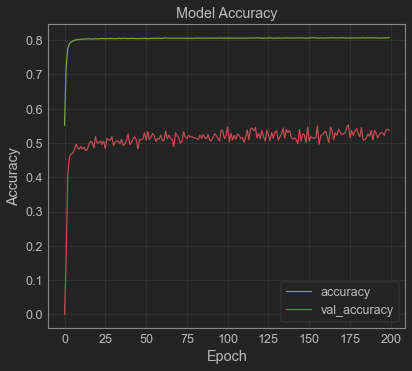

In [9]:
# 모델 정확도 시각화
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'r-', label='val_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [10]:
# Full x_data test
test_data = np.loadtxt('MIMO_2_0dB_test.csv', delimiter=',', dtype=np.float32)
x_test_data = test_data[:, 1:13]
y_test_data = test_data[:, -4:]
print(x_test_data.shape, y_test_data.shape)

(80000, 12) (80000, 4)


In [11]:
# Convert y_test_data to y_test_bit
i=1
y_test_merge = []
while i <= y_test_data.shape[0]:
    temp2 = "".join(str(_) for _ in y_test_data[i-1,:])
    y_test_merge.append(temp2)
    i = i + 1

encoder = LabelEncoder()
encoder.fit(y_test_merge)
y_test_bit = encoder.transform(y_test_merge)
y_test_bit = y_test_bit.reshape(-1, 1)
print(y_test_bit)

[[1]
 [1]
 [1]
 ...
 [2]
 [2]
 [2]]


In [12]:
# Convert y_data to one_hot
y_test_one_hot = tf.keras.utils.to_categorical(y_test_bit, nb_classes)
print("one_hot:", y_test_one_hot)

one_hot: [[0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 ...
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]]


In [13]:
evaluation = tf.model.evaluate(x_test_data, y_test_one_hot)
print('loss: ', evaluation[0])
print('accuracy', evaluation[1])

2500/2500 [==============================] - 4s 2ms/step - loss: 0.6159 - accuracy: 0.7563
loss:  0.6158942580223083
accuracy 0.7563375234603882


In [14]:
predict_x = tf.model.predict(x_test_data) 
pred = np.argmax(predict_x,axis=1)
# for p, y in zip(pred, y_test_bit.flatten()):
 #   print("[{}] Prediction: {} True Y: {}".format(p == int(y), p, int(y)))

In [15]:
res_pred = pred.reshape(y_test_data.shape[0], 1)
error_cnt = 0
error = 0
for i in range(0, y_test_data.shape[0]):
    if res_pred[i] != y_test_bit[i]:
        #print("False : {}".format(i))
        #print("[{}] data : {}".format(i, y_test_data[i]))
        error += 1
        for n in range(0, y_test_data.shape[0], int(y_test_data.shape[0]/nb_classes)):
            if y_test_bit[n] == res_pred[i]:
                #print("[{}] pred data: {}".format(n, y_test_data[n]))
                bit_error = 0
                for m in range(0, y_test_data.shape[1]): 
                    if y_test_data[i, m] != y_test_data[n, m]:
                        bit_error += 1
                        error_cnt += 1
                #print("bit error count : ", bit_error)
                break
print("Error : {}".format(error))
print("Error Count: {}".format(error_cnt))

Error : 19493
Error Count: 21363


In [16]:
BER = (error_cnt)/(y_test_data.shape[0]*2*2)
print("BER: {}".format(BER))

BER: 0.066759375
